#  Netflix Dataset Analysis



  ![Netflix Logo](https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg)



## About the Dataset
This dataset contains information about *Netflix Movies and TV Shows*, including details such as title, director, cast, country, release year, rating, duration, genre, and description.

##  What We Will Do
We will perform *Exploratory Data Analysis (EDA)* using Python (Pandas, Seaborn, Matplotlib) to understand the dataset, clean it, and find insights.

## Expected Output
- Number of Movies vs TV Shows  
- Trends over the years  
- Most common genres and countries  
- Visualizations with bar graphs and count plots
- RECOMMENDATION SYSTEM

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data/Netflix Dataset.csv


In [3]:
#Importing the datasets
import pandas as pd
data = pd.read_csv("/kaggle/input/netflix-data/Netflix Dataset.csv")

## Checking and Removing Duplicates

Before diving deeper into analysis, it’s essential to check for duplicate rows in our dataset.  
Duplicate records can skew results and affect the quality of insights.  
In this step, we will:

- Check for duplicate rows
- Remove any duplicates found
- Confirm that our dataset is now unique and ready for analysis


In [6]:
# to check and detect the duplicate rows
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [7]:
#to Remove the duplicate rows permanemtly
data.drop_duplicates(inplace = True)

## Checking for Null Values (Missing Data) with Heatmap

Handling missing data is a crucial part of any data analysis project.  
Let’s check if any columns in our Netflix dataset contain null (missing) values.

- Display a count of null values for each column.
- Visualize the presence of missing data using a heatmap.
- This helps us quickly understand which columns require data cleaning or further attention.
****

In [10]:
#to show where Null value is present
data.isnull()
#to show the count of null values in each column
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

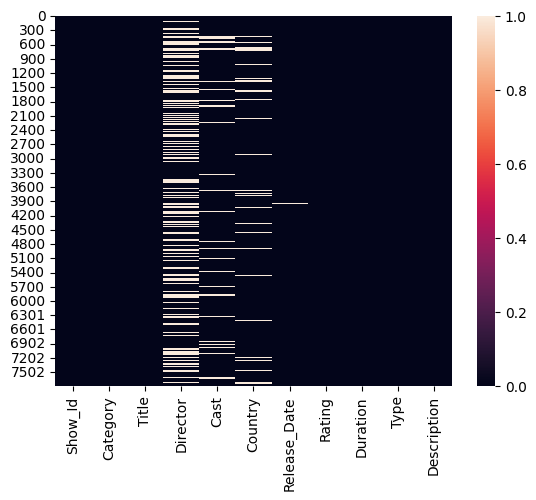

In [11]:
#Using heat-map to show null values count
import seaborn as sns 
sns.heatmap(data.isnull())

## Handle Missing Values

After identifying missing values, this step focuses on handling them appropriately.  
- Decide which columns to fill with default values (e.g., "Unknown" for text fields).  
- Drop rows with critical missing values if necessary.  
- Prepare a clean dataset for further analysis and modeling.


In [10]:
# Fill missing 'director' and 'cast' with 'Unknown'
data['Director'].fillna('Unknown')
data['Cast'].fillna('Unknown')

data.dropna(subset=['Country', 'Release_Date'], inplace=True)

print(data[['Director', 'Cast', 'Country', 'Release_Date']].isnull().sum())


Director        0
Cast            0
Country         0
Release_Date    0
dtype: int64


## Fix Data Types and Feature Engineering

Ensure all columns have correct data types for analysis:  
- Convert date columns (e.g., release date) to datetime objects.  
- Extract new features from existing data, like release year from the date.  
- This prepares the dataset for time-based analysis and modeling.


In [14]:
data['Release_Date'] = data['Release_Date'].astype(str).str.strip()
# Convert 'date_added' to datetime type
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

# Extract 'year_added' and 'month_added' as new features
data['Release_year'] = data['Release_Date'].dt.year
data['Release_month'] = data['Release_Date'].dt.month

# Check datatypes after conversion
print(data.dtypes[['Release_Date', 'Release_year', 'Release_month']])


Release_Date     datetime64[ns]
Release_year              int32
Release_month             int32
dtype: object


## Exploratory Data Analysis (EDA)

Analyze and visualize key aspects of Netflix content:  
- Number of Movies vs TV Shows  
- Top genres and content categories  
- Distribution of content by countries  
- Content release trends over the years  
Use counts, groupbys, and Seaborn/Matplotlib plots to reveal these patterns.


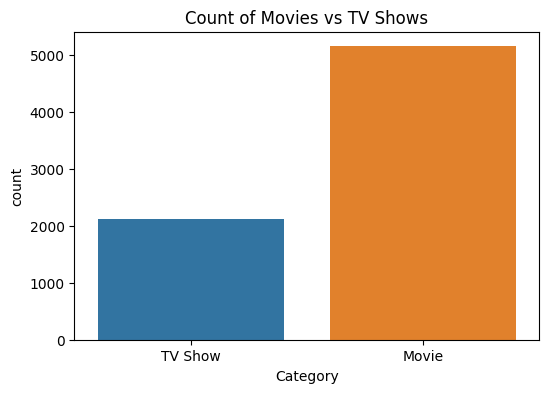

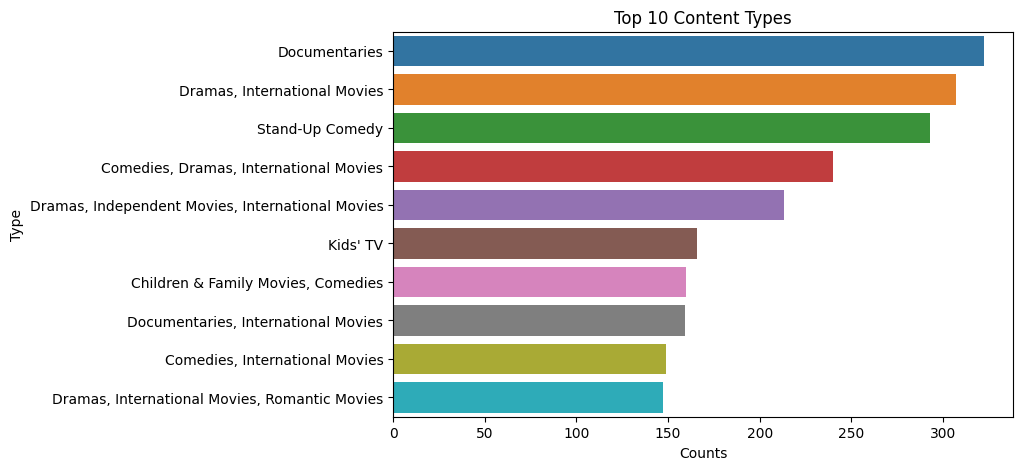

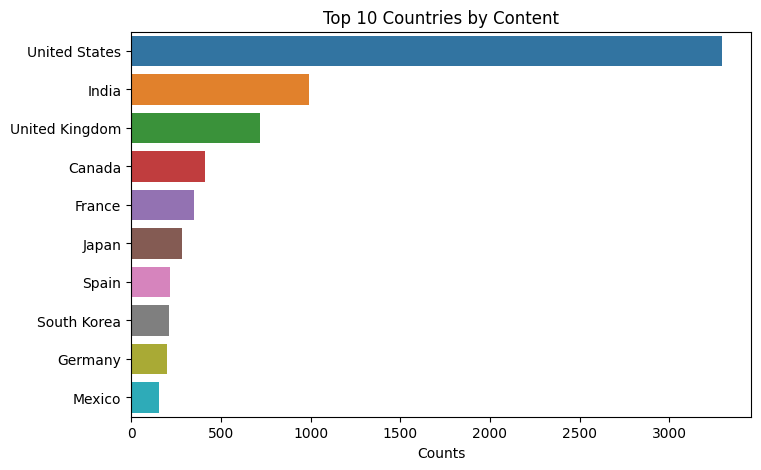

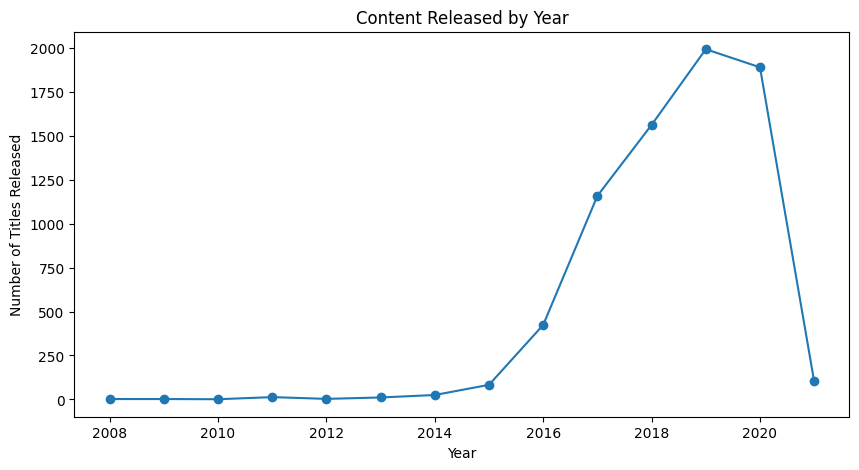

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Number of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Category')
plt.title("Count of Movies vs TV Shows")
plt.show()

# 2. Top 10 genres (from 'Type' or split 'Description' or 'Category')
# If you want to use 'Type' as genres (might not be as detailed):
top_types = data['Type'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_types.values, y=top_types.index)
plt.title("Top 10 Content Types")
plt.xlabel("Counts")
plt.show()

# If you have a genre or listed_in-like column (e.g., 'Description' is NOT genres), you can skip this block or use 'Description'.

# 3. Content by country - Top 10 countries
top_countries = data['Country'].str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Content")
plt.xlabel("Counts")
plt.show()

# 4. Content released by year
content_by_year = data['Release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
content_by_year.plot(kind='line', marker='o')
plt.title("Content Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.show()

## Data Filtering and Subsetting

Practice filtering the dataset to extract meaningful subsets:  
- Filter by genre or country  
- Filter by release year or content type  
Use single or multiple conditions combining AND/OR logic.


In [20]:
# Movies released after 2015
movies_post_2015 = data[(data['Category'] == 'Movie') & (data['Release_year'] > 2015)]
print(f"Number of movies released after 2015: {movies_post_2015.shape[0]}")

# TV Shows from India
india_tvshows = data[(data['Category'] == 'TV Show') & (data['Country'].str.contains('India', na=False))]
print(f"Number of Indian TV Shows: {india_tvshows.shape[0]}")

Number of movies released after 2015: 5050
Number of Indian TV Shows: 75


## Advanced Data Wrangling

Process and analyze complex columns:  
- Split multi-genre columns into separate entries  
- Group data based on genres, release year, or countries for deeper insights  
- Aggregate statistics like counts or averages on these groups.


In [22]:
# Split genres/types into separate rows for detailed analysis
genre_split = data[['Show_Id', 'Type']].copy()

# Split multiple entries within 'Type' column if needed (if comma separated)
genre_split['Type'] = genre_split['Type'].str.split(', ')

# Explode the list to separate rows
genre_exploded = genre_split.explode('Type')

# Count titles per genre/type
genre_counts = genre_exploded['Type'].value_counts()

print("Top genres count (splitted):")
print(genre_counts.head(10))

Top genres count (splitted):
Type
International Movies      2342
Dramas                    2064
Comedies                  1430
International TV Shows    1042
Documentaries              742
Action & Adventure         706
Independent Movies         672
TV Dramas                  622
Romantic Movies            521
Thrillers                  481
Name: count, dtype: int64


##  Build Movie Recommendation System

Develop a recommendation engine that suggests movies similar to a user’s watched choice:  
- Use content-based filtering (e.g., cosine similarity on genres, cast, description)  
- Optionally, implement collaborative filtering if ratings data is available  
- This is the primary goal: enhance personalized viewer experience with relevant suggestions.


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Fill NaN with empty strings in text columns
data['Description'] = data['Description'].fillna('')
data['Director'] = data['Director'].fillna('')
data['Cast'] = data['Cast'].fillna('')
data['Type'] = data['Type'].fillna('')

# Combine columns to make content profile
data['content_info'] = (data['Description'] + ' ' + data['Director'] + ' ' + data['Cast'] + ' ' + data['Type'])

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['content_info'])

# Cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Map titles to indices
indices = pd.Series(data.index, index=data['Title']).drop_duplicates()

def recommend_movies(title, n=5):
    idx = indices.get(title)
    if idx is None:
        return f"Movie '{title}' not found."
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]  # exclude the movie itself
    movie_indices = [i[0] for i in sim_scores]  # Extract indices from tuples
    return data['Title'].iloc[movie_indices].tolist()

# Example usage
print(recommend_movies("Inception"))  # Change to a title in your data

['Tune in for Love', 'Operation Chromite', 'Revenger', 'My Secret Romance', 'Prison Playbook']


##  Summarize Insights and Business Implications

Wrap up your analysis:  
- Summarize top insights from EDA and recommendation results  
- Discuss potential business decisions Netflix could make based on this data  
- Emphasize the importance of personalized recommendations for user engagement.
